In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, GlobalAveragePooling2D, InputLayer, LeakyReLU
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg19, resnet
from keras.layers import *
from keras.models import Model,Sequential
from keras import optimizers
from keras import regularizers
import tensorflow as tf
from tensorflow import keras
import os
import shutil
import glob 
import csv
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split


C:\Users\sagor\AppData\Local\Temp\ipykernel_13916\4273783959.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
def gen_label(directory):
    label = []
    for dir in os.listdir(directory):
        for files in os.listdir(os.path.join(directory, dir)):
            if (dir == 'Cancer'):
                label.append(str(0))
            elif (dir == 'Healthy'):
                label.append(str(1))
    return label

def get_path(directory):
    path = []
    for dirs in os.listdir(directory):
        for files in os.listdir(os.path.join(directory, dirs)):
            path.append(dirs + "/" +files)
    return path

In [3]:
train_y = gen_label('./dataset/train')
train_x = get_path('./dataset/train')

In [4]:
df = pd.DataFrame({'filename': train_x,
                  'category': train_y})
print(df)


                           filename category
0             Cancer/Cancer (1).jpg        0
1             Cancer/Cancer (1).tif        0
2            Cancer/Cancer (10).jpg        0
3           Cancer/Cancer (100).jpg        0
4          Cancer/Cancer (1002).JPG        0
...                             ...      ...
3664  Healthy/Not Cancer  (995).jpg        1
3665  Healthy/Not Cancer  (996).jpg        1
3666  Healthy/Not Cancer  (997).jpg        1
3667  Healthy/Not Cancer  (998).jpg        1
3668  Healthy/Not Cancer  (999).jpg        1

[3669 rows x 2 columns]


In [5]:
train_df, valid_df = train_test_split(df, test_size=0.25)
print(train_df.shape)
print(valid_df.shape)

(2751, 2)
(918, 2)


In [6]:
image_data = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.2,
                                zoom_range=(0.99,0.99))

def preprocessingTrain(path):
    image = image_data.flow_from_directory(directory=path, 
                                           target_size=(224,224), 
                                           batch_size=8, 
                                           seed=123,
                                           subset='training',)
    return image

In [7]:
def preprocessingVal(path):
    
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path,
                                           seed=123,
                                           target_size = (224,224),
                                           batch_size = 8,
                                           )
    return image

In [8]:
def preprocessingTest(path):
    
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path,
                                           seed=123,
                                           target_size = (224,224),
                                           batch_size = 8,
                                           )
    
    return image

In [9]:
path = './dataset/train'
train_data = preprocessingTrain(path)

Found 2936 images belonging to 2 classes.


In [10]:
path = './dataset/val'
val_data= preprocessingVal(path)

Found 909 images belonging to 2 classes.


In [11]:
path = './dataset/test'
test_data = preprocessingTest(path)

Found 909 images belonging to 2 classes.


In [13]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam

model = Sequential()

pretrained_model= VGG19(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid')) 
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 20,551,746
Trainable params: 527,362
Non-trainable params: 20,024,384
_________________________________________________________________


c:\Users\sagor\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [15]:
# Early stopping and model checkpoint
from keras import utils, callbacks

earlystopping = callbacks.EarlyStopping(monitor="val_loss", 
                                        mode="min", 
                                        patience=5, 
                                        restore_best_weights = True)

In [16]:
# model = Sequential()
history = model.fit_generator(train_data,
                              verbose=1,
                              callbacks = [earlystopping],
                              epochs=30,
                              validation_data=(val_data))

c:\Users\sagor\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
367/367 [==============================] - 66s 159ms/step - loss: 0.4634 - accuracy: 0.7803 - val_loss: 0.4145 - val_accuracy: 0.8119
Epoch 2/30
367/367 [==============================] - 54s 146ms/step - loss: 0.3632 - accuracy: 0.8379 - val_loss: 0.6266 - val_accuracy: 0.7349
Epoch 3/30
367/367 [==============================] - 53s 144ms/step - loss: 0.2907 - accuracy: 0.8770 - val_loss: 0.3499 - val_accuracy: 0.8471
Epoch 4/30
367/367 [==============================] - 53s 144ms/step - loss: 0.2604 - accuracy: 0.8879 - val_loss: 0.2109 - val_accuracy: 0.9109
Epoch 5/30
367/367 [==============================] - 54s 147ms/step - loss: 0.2643 - accuracy: 0.8774 - val_loss: 0.2707 - val_accuracy: 0.8713
Epoch 6/30
367/367 [==============================] - 55s 150ms/step - loss: 0.2265 - accuracy: 0.9063 - val_loss: 0.3134 - val_accuracy: 0.8548
Epoch 7/30
367/367 [==============================] - 55s 151ms/step - loss: 0.2044 - accuracy: 0.9206 - val_loss: 0.3659 - val_ac

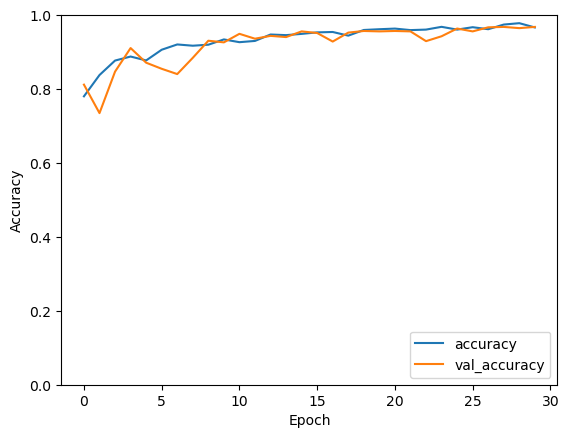

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


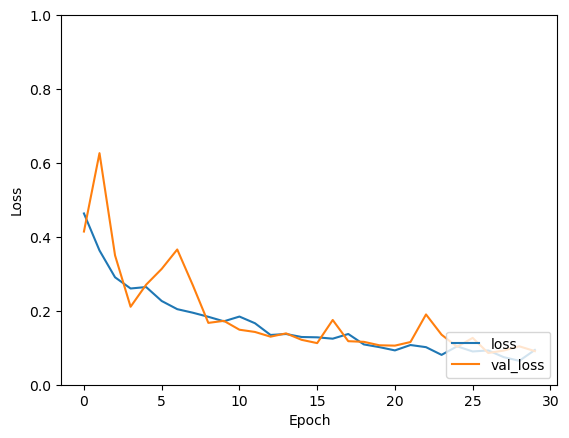

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [19]:
model.pop()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
Total params: 20,549,696
Trainable params: 525,312
Non-trainable params: 20,024,384
_________________________________________________________________


In [21]:
feature_list = []
for path in train_df['filename'].to_numpy():
    full_path = './dataset/train/'+ path
    x = load_img(full_path,target_size=(224,224))
    img_array = img_to_array(x)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    feature_list.append(features)
    
# feat_lst = np.reshape(feature_list,(-1,7*7*512))

In [22]:
feat_lst = np.reshape(feature_list,(-1,1024))

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# features = tarnsfer_model.predict(test_data)
# y  = test_label.astype('int')
y = train_df['category'].to_numpy()
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(feat_lst,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 2020)

In [24]:
import csv

# Assuming `features` is a numpy array
import numpy as np

# Define the image names
img_names = [y[i] for i in range(feat_lst.shape[0])]

# Write the features to a CSV file with column names and image names
with open('features.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image Label'] + list(range(1, feat_lst.shape[1]+1)))
    for i, row in enumerate(feat_lst):
        writer.writerow([img_names[i]] + list(row))

# Read the features from the CSV file
with open('features.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader) # Skip the first row (headers)
    img_names = [row[0] for row in reader] # Extract the image names
    feat_lst = np.array([row[1:] for row in reader]).astype(float) # Extract the features


RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4020)

#train classifier
rf_classifier.fit(train_features, train_labels)

# Make predictions on the test data
test_predictions = rf_classifier.predict(test_features)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9473684210526315


Precision for Brain Tumor

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions, pos_label='0')
recall = recall_score(test_labels, test_predictions, pos_label='0')
f1 = f1_score(test_labels, test_predictions, pos_label='0')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9372937293729373
Recall:  0.9659863945578231
F1-score:  0.9514237855946398


Precision for Healthy

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions, pos_label='1')
recall = recall_score(test_labels, test_predictions, pos_label='1')
f1 = f1_score(test_labels, test_predictions, pos_label='1')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9596774193548387
Recall:  0.9260700389105059
F1-score:  0.9425742574257425


KNN

In [28]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knnClassifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)  
knnClassifier.fit(train_features, train_labels)  

# Make predictions on the test data
test_predictions_knn = knnClassifier.predict(test_features)

# Calculate accuracy on the test data
test_accuracy_knn = accuracy_score(test_labels, test_predictions_knn)

print("Test accuracy: ", test_accuracy_knn)

Test accuracy:  0.9201451905626135


Brain Tumor

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_knn, pos_label='0')
recall = recall_score(test_labels, test_predictions_knn, pos_label='0')
f1 = f1_score(test_labels, test_predictions_knn, pos_label='0')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.8955696202531646
Recall:  0.9625850340136054
F1-score:  0.9278688524590163


Healthy

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_knn, pos_label='1')
recall = recall_score(test_labels, test_predictions_knn, pos_label='1')
f1 = f1_score(test_labels, test_predictions_knn, pos_label='1')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.9531914893617022
Recall:  0.8715953307392996
F1-score:  0.9105691056910569


ADA Boost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ab_classifier = AdaBoostClassifier(n_estimators=10, random_state=2020)
ab_classifier.fit(train_features, train_labels)
test_predictions_ab = ab_classifier.predict(test_features)
test_accuracy_ab = accuracy_score(test_labels, test_predictions_ab)

print("Test accuracy: ", test_accuracy_ab)

Test accuracy:  0.8638838475499092


Brain Tumor

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_ab, pos_label='0')
recall = recall_score(test_labels, test_predictions_ab, pos_label='0')
f1 = f1_score(test_labels, test_predictions_ab, pos_label='0')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.8543689320388349
Recall:  0.8979591836734694
F1-score:  0.8756218905472637


Healthy

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision
precision = precision_score(test_labels, test_predictions_ab, pos_label='1')
recall = recall_score(test_labels, test_predictions_ab, pos_label='1')
f1 = f1_score(test_labels, test_predictions_ab, pos_label='1')


print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.8760330578512396
Recall:  0.8249027237354085
F1-score:  0.8496993987975952


In [34]:
def get_path(directory):
    path = []
    for dirs in os.listdir(directory):
        for files in os.listdir(os.path.join(directory, dirs)):
            path.append(dirs + "/" +files)
    return path

In [35]:
test_x = get_path('./dataset/test/')

In [36]:
# define function for evaluating model performance on test images
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img

testdf = pd.DataFrame({'filename': test_x})
test_sample = testdf.sample(n = 20, random_state=2020)

def test_img(model,name):
    result_lst = []
    for path in test_sample['filename'].to_numpy():
        full_path = './dataset/test/'+path
        x = load_img(full_path, target_size=(224,224))
        img_array = img_to_array(x)
        img_array = np.expand_dims(img_array, axis=0)
        if name == 'random_forest':
            features = model.predict(img_array)
            result = rf_classifier.predict(features)
        elif name == 'knn':
            features = model.predict(img_array)
            result = knnClassifier.predict(features)
        elif name == 'adaboost':
            features = model.predict(img_array)
            result = ab_classifier.predict(features)
        result = 'Healthy' if float(result) > 0.5 else 'Brain Tumor'
        
        result_lst.append(result)
    return result_lst

In [37]:

rf_result = test_img(model,'random_forest')
ada_result = test_img(model,'adaboost')
knn_result = test_img(model,'knn')

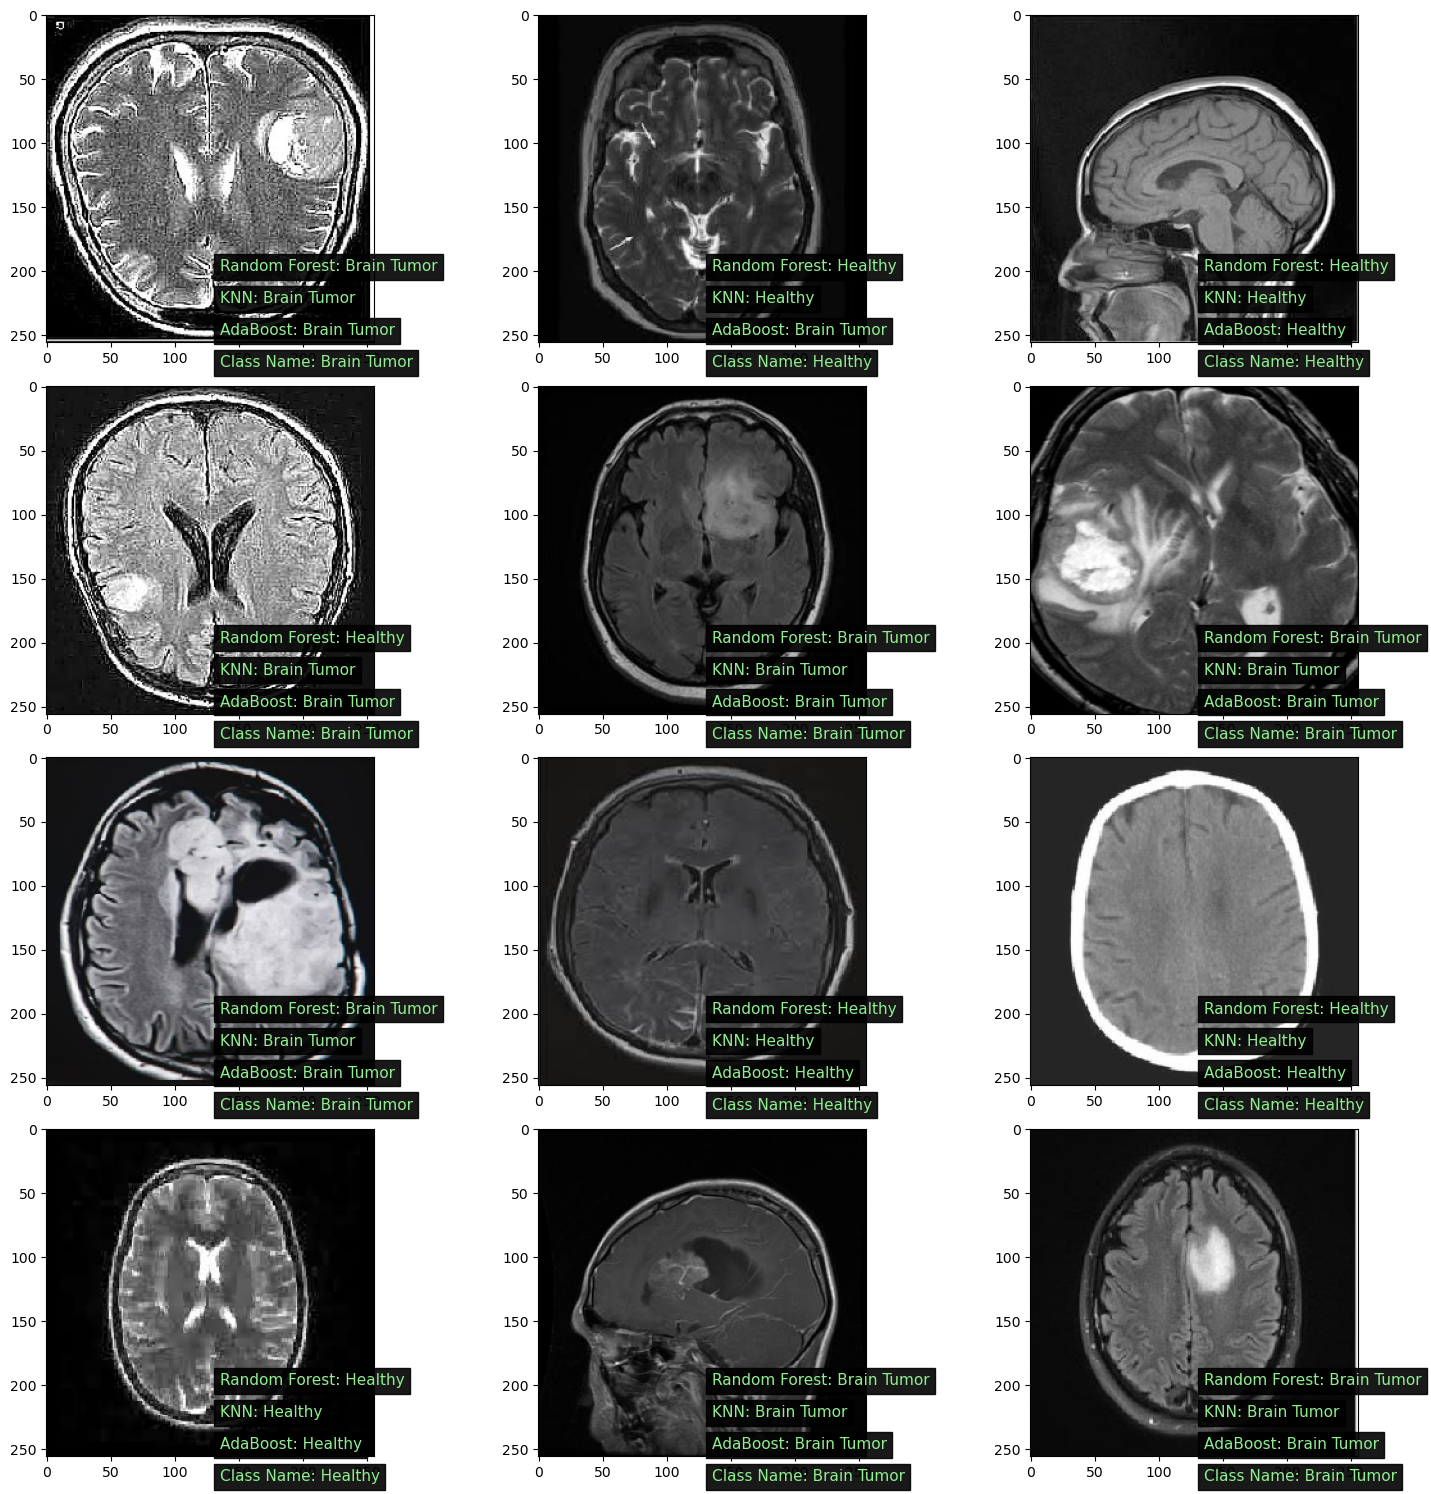

In [38]:
# plotting images with prediction
pred_results  = list(zip(rf_result,knn_result, ada_result))
test_array = test_sample['filename'].to_numpy()

plt.figure(figsize=(15, 15))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    rf, knn, ab= pred_results[i]
    img = test_array[i]
    path = './dataset/test/' + img
    name = img.split('/')[0]
    if(name == 'Cancer'):
        name = 'Brain Tumor'
    image = load_img(path, target_size=(256,256))
    # plt.text(135, 200, 'Custom CNN: {}'.format(cust), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 200, 'Random Forest: {}'.format(rf), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 225, 'KNN: {}'.format(knn), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 250, 'AdaBoost: {}'.format(ab), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    plt.text(135, 275, 'Class Name: {}'.format(name), color='lightgreen',fontsize= 11, bbox=dict(facecolor='black', alpha=0.9))
    
    plt.imshow(image)

plt.tight_layout()
plt.show()